In [1]:
!pip3 install catppuccin

In [2]:
import catppuccin
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use(["dark_background", catppuccin.PALETTE.mocha.identifier])

In [3]:
df = pd.read_csv("../datasets/data_titanic.csv")

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
null_values = df.isnull().sum()
null_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# plt.style.use("dark_background")

Text(0, 0.5, 'Count')

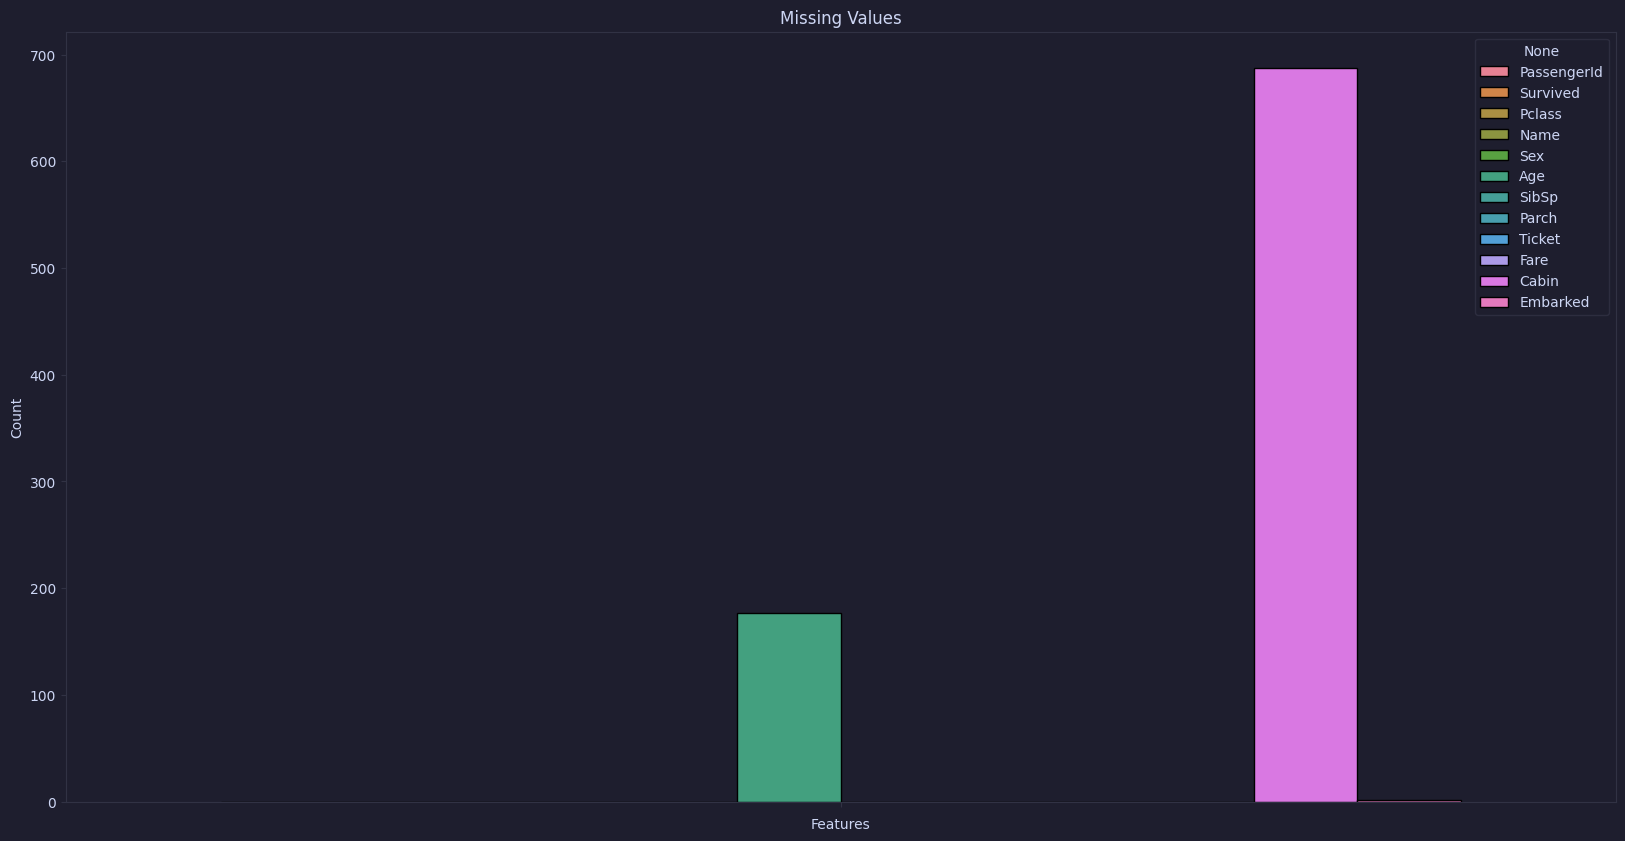

In [12]:
plt.figure(figsize=(20, 10))
sns.barplot(
    hue=null_values.index,
    y=null_values,
    edgecolor="black",
)
plt.title("Missing Values")
plt.xlabel("Features")
plt.ylabel("Count")

In [13]:
df.drop("Cabin", axis=1, inplace=True)

In [14]:
df["Age"] = df["Age"].fillna(np.mean(df["Age"]))

In [15]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
survived = df["Survived"]

Text(0, 0.5, 'Fare')

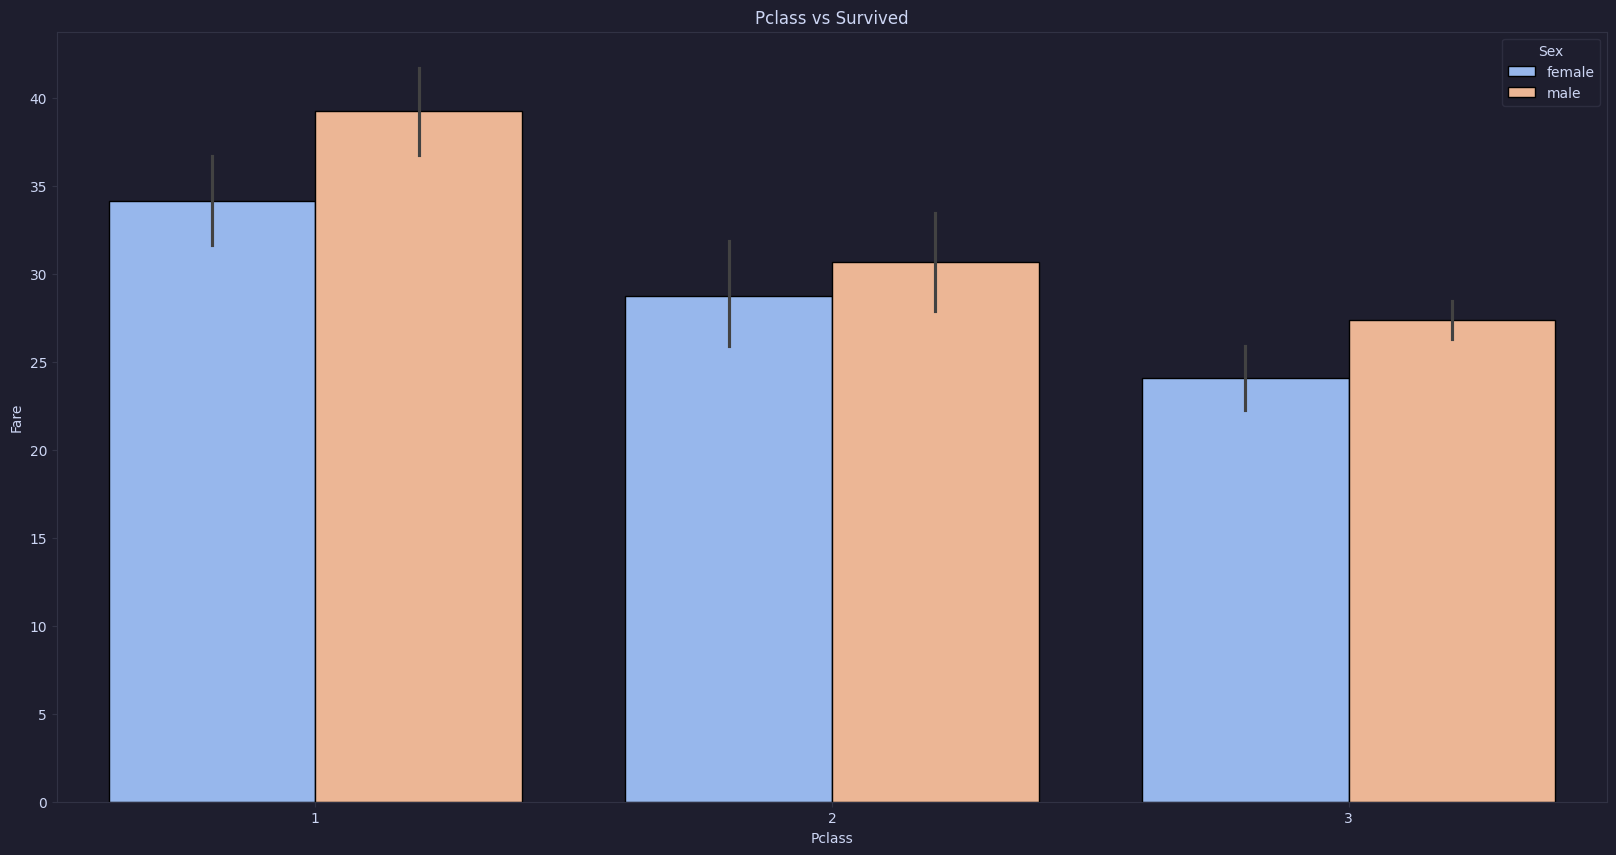

In [18]:
plt.figure(figsize=(20, 10))
sns.barplot(
    data=df,
    hue="Sex",
    x="Pclass",
    y="Age",
    edgecolor="black",
)
plt.title("Pclass vs Survived")
plt.xlabel("Pclass")
plt.ylabel("Fare")

Text(0, 0.5, 'Count')

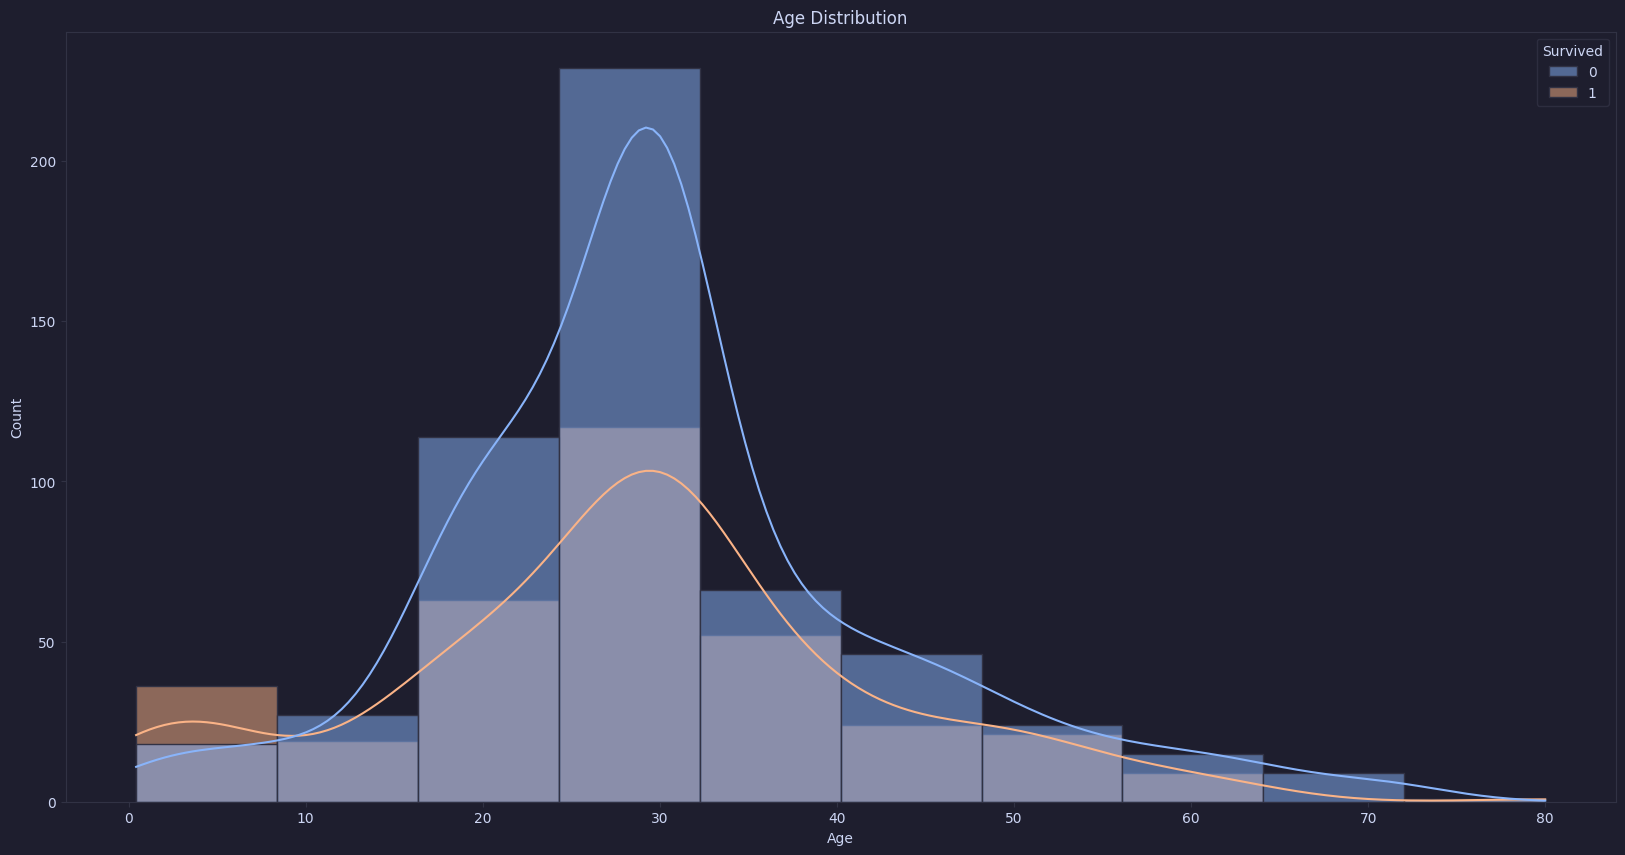

In [19]:
plt.figure(figsize=(20, 10))
sns.histplot(df, x="Age", hue="Survived", bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

Text(0.5, 1.0, 'Line Plot of Fare over Passenger Index')

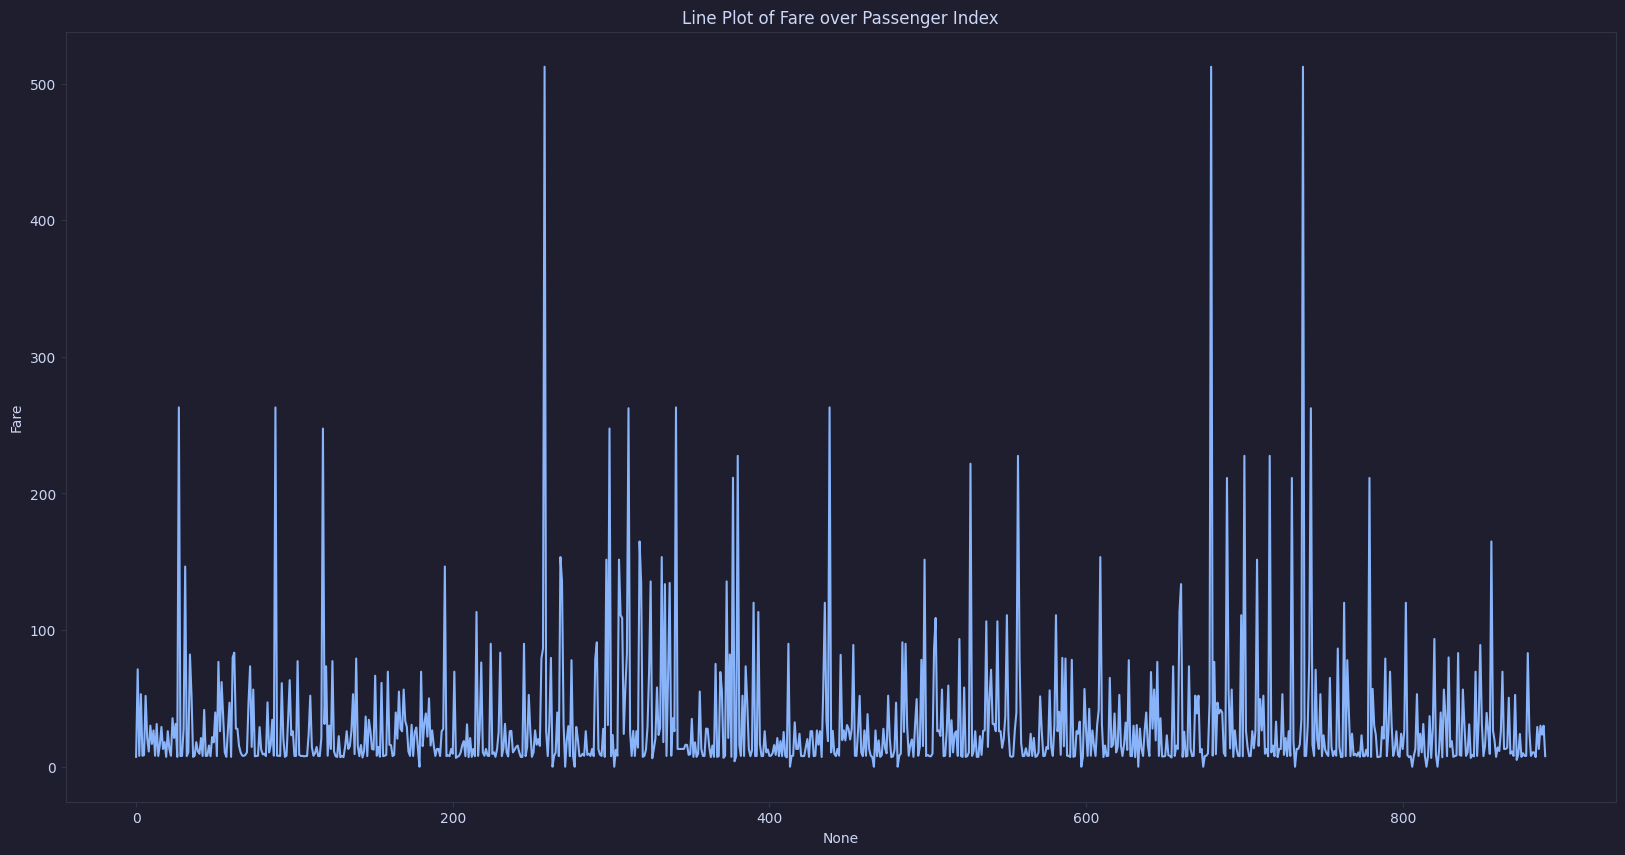

In [20]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x=df.index, y="Fare")
plt.title("Line Plot of Fare over Passenger Index")

Text(0.5, 1.0, 'Pclass vs Age')

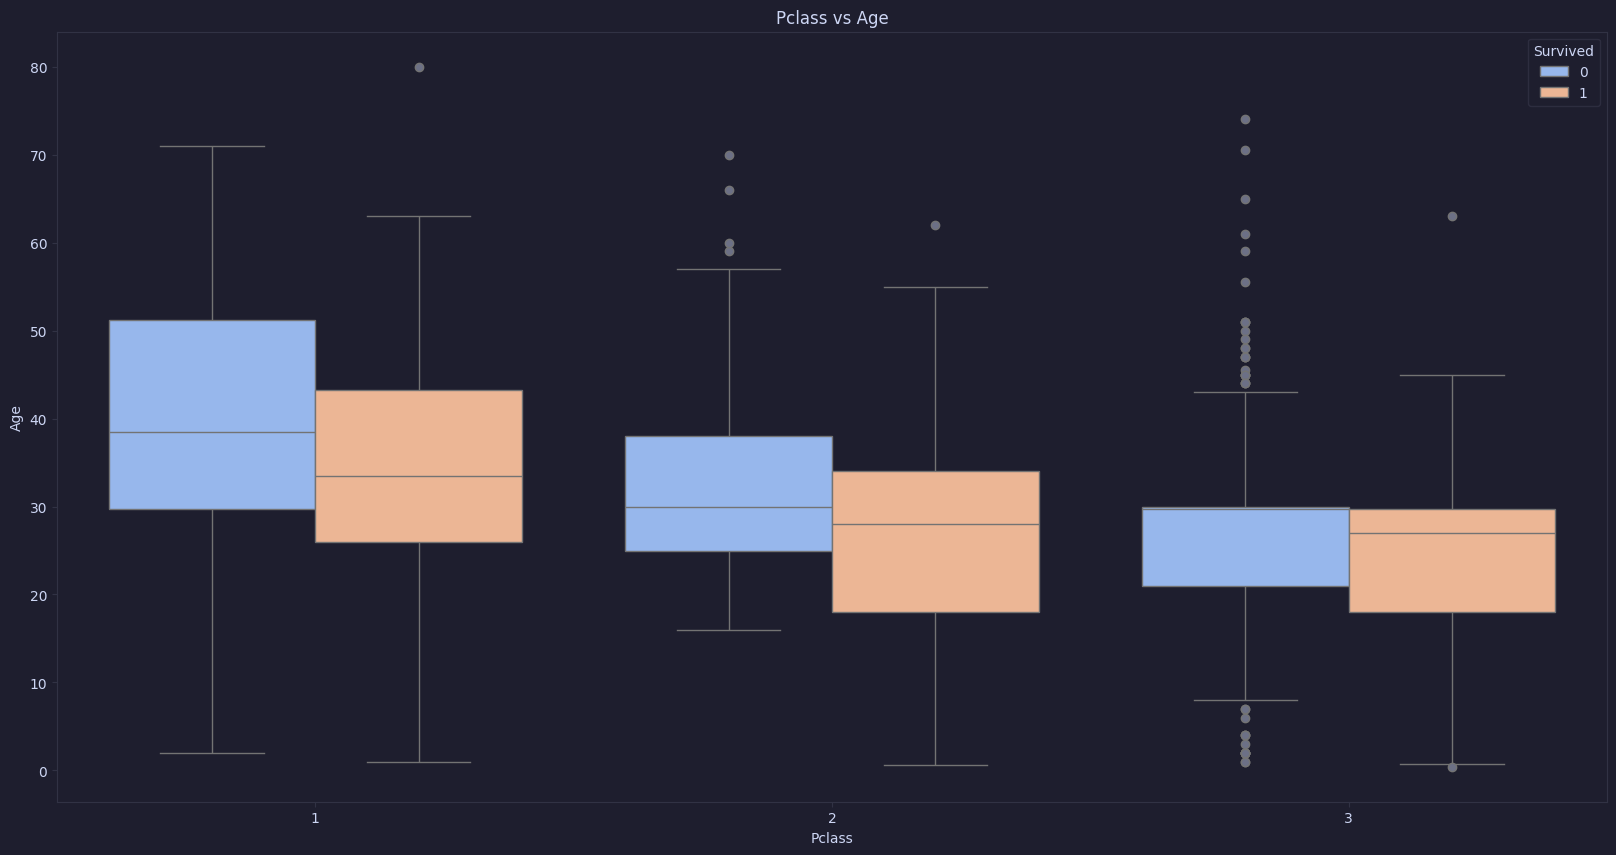

In [21]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x="Pclass", y="Age", hue="Survived")
plt.title("Pclass vs Age")

Text(0.5, 1.0, 'Age vs Fare')

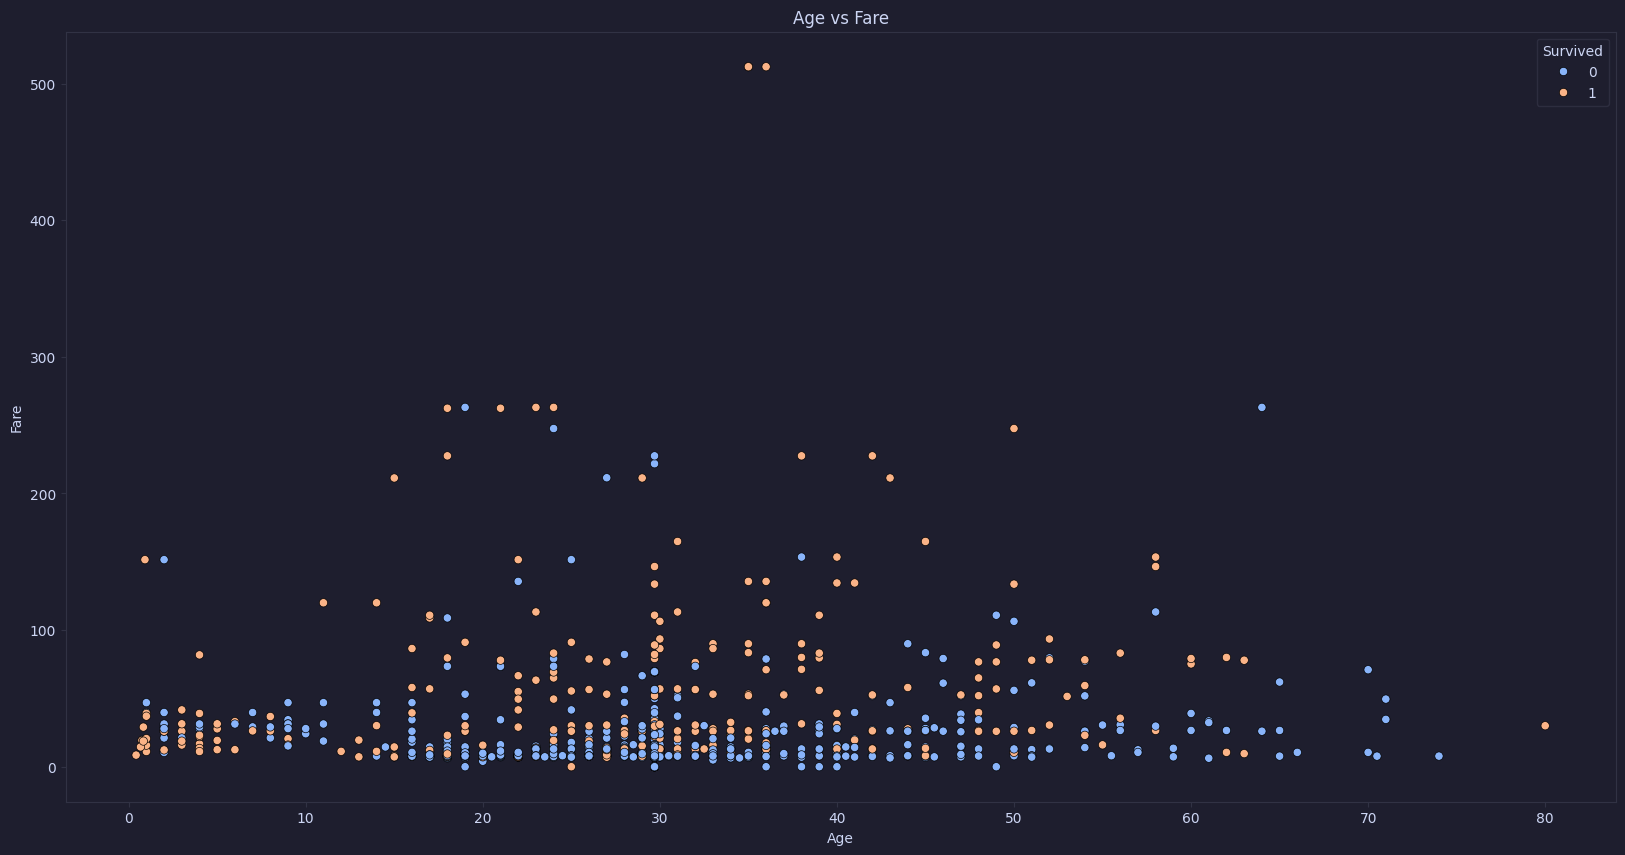

In [22]:
plt.figure(figsize=(20, 10))
sns.scatterplot(
    data=df,
    x="Age",
    y="Fare",
    hue="Survived",
    edgecolor="black",
)
plt.title("Age vs Fare")

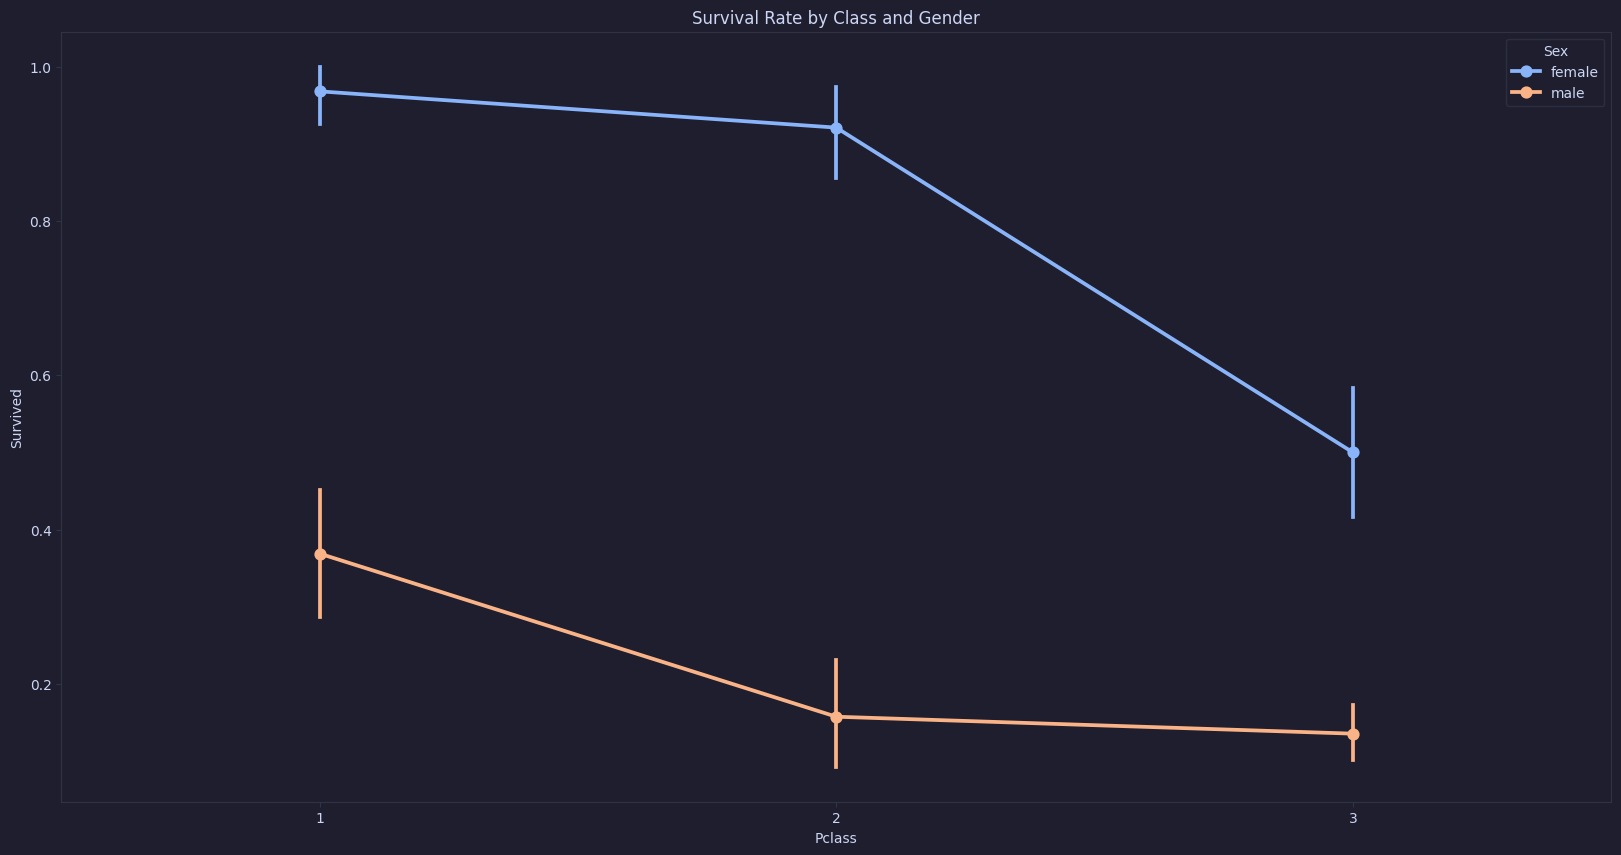

In [23]:
plt.figure(figsize=(20, 10))
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.title("Survival Rate by Class and Gender")
plt.show()

Text(0.5, 1.0, 'Survival Count by Sex')

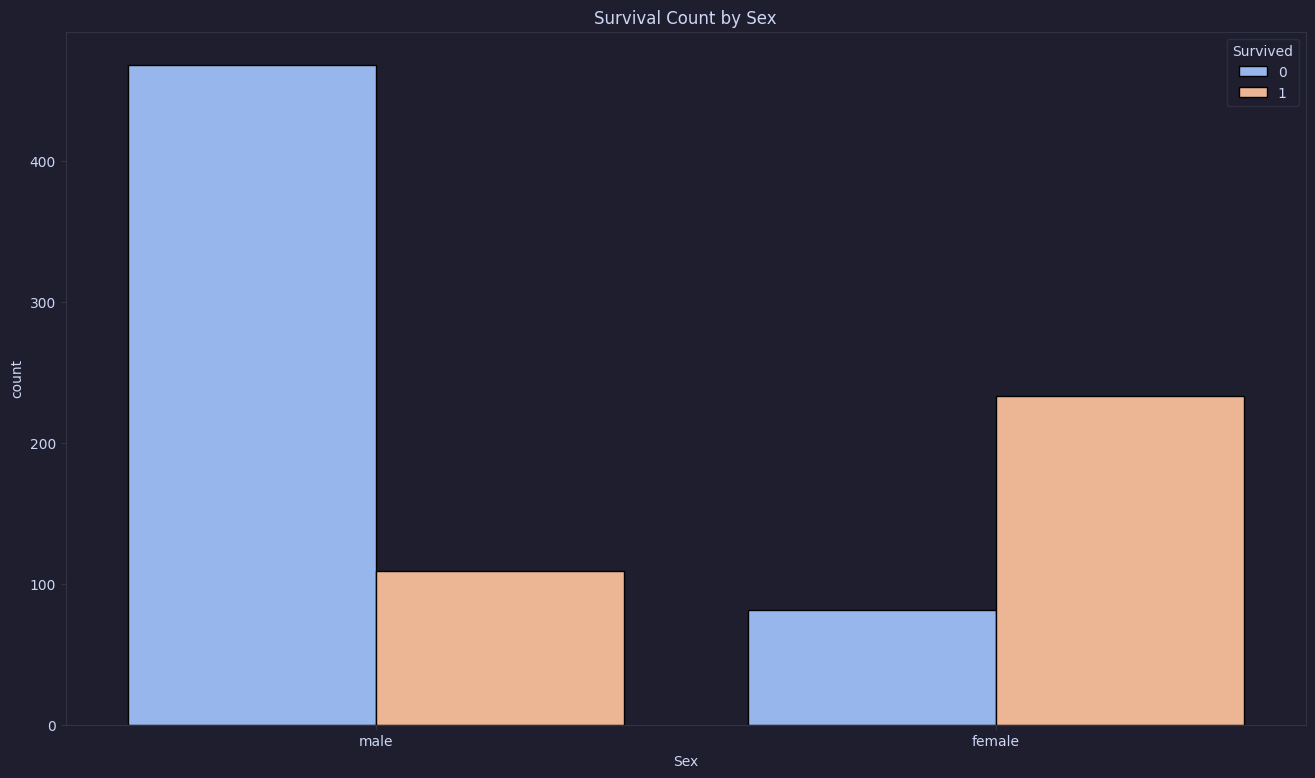

In [24]:
plt.figure(figsize=(16, 9))
sns.countplot(
    x="Sex",
    hue="Survived",
    data=df,
    edgecolor="black",
)
plt.title("Survival Count by Sex")

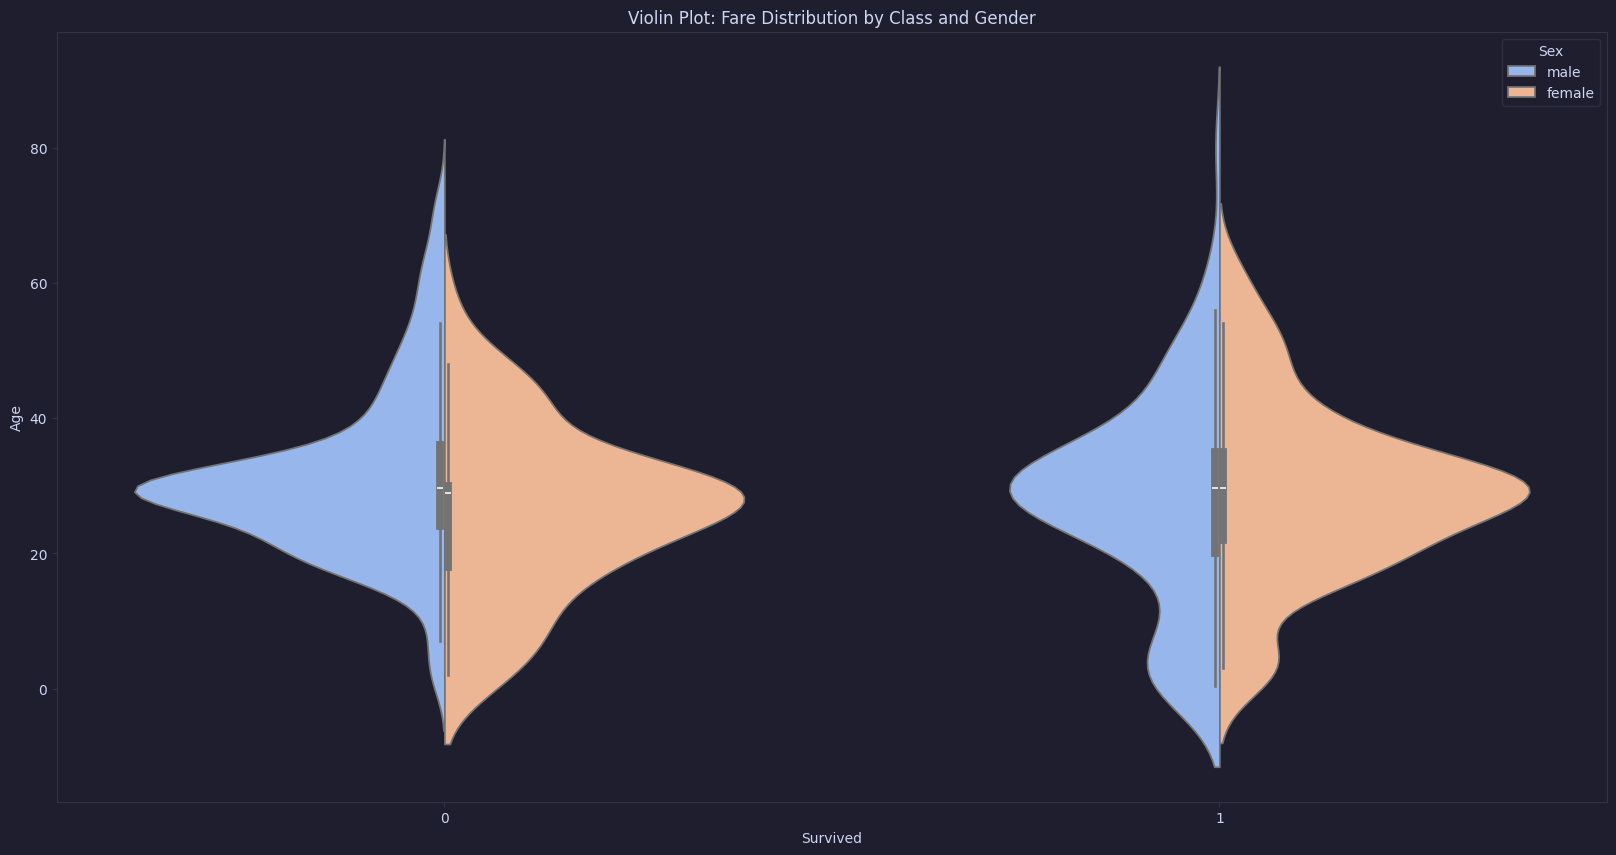

In [25]:
plt.figure(figsize=(20, 10))

sns.violinplot(
    x="Survived",
    y="Age",
    hue="Sex",
    data=df,
    split=True,
)
plt.title("Violin Plot: Fare Distribution by Class and Gender")
plt.show()

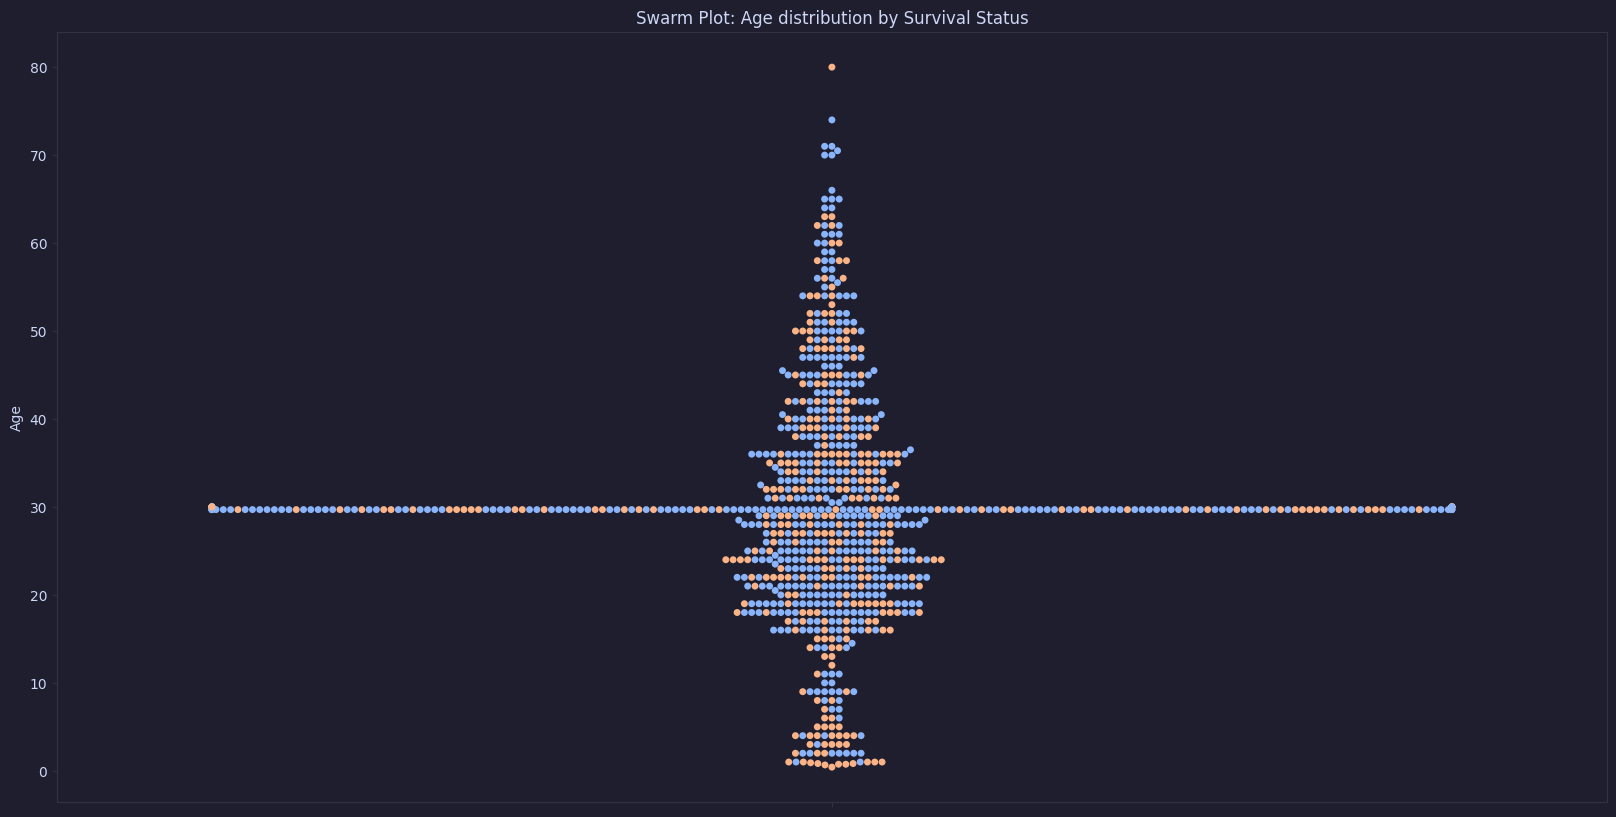

In [26]:
plt.figure(figsize=(20, 10))

sns.swarmplot(
    y="Age", hue="Survived", data=df, dodge=False, legend=False, edgecolor="black"
)
plt.title("Swarm Plot: Age distribution by Survival Status")
plt.show()

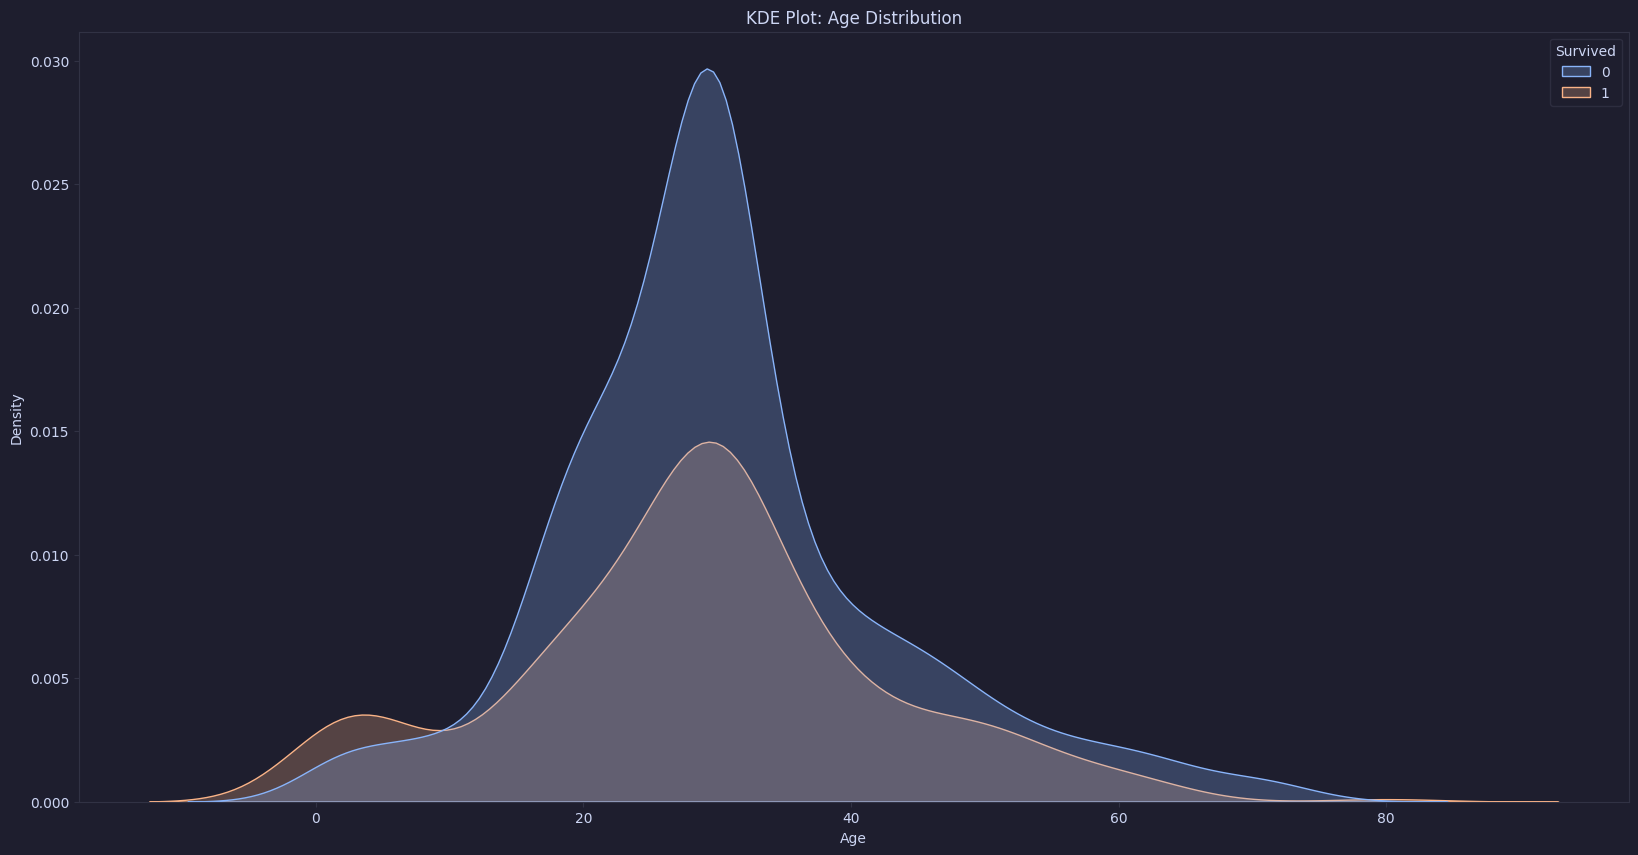

In [27]:
plt.figure(figsize=(20, 10))

sns.kdeplot(data=df, hue="Survived", x="Age", fill=True)
plt.title("KDE Plot: Age Distribution")
plt.show()

Text(0.5, 1.0, 'Age vs Sex')

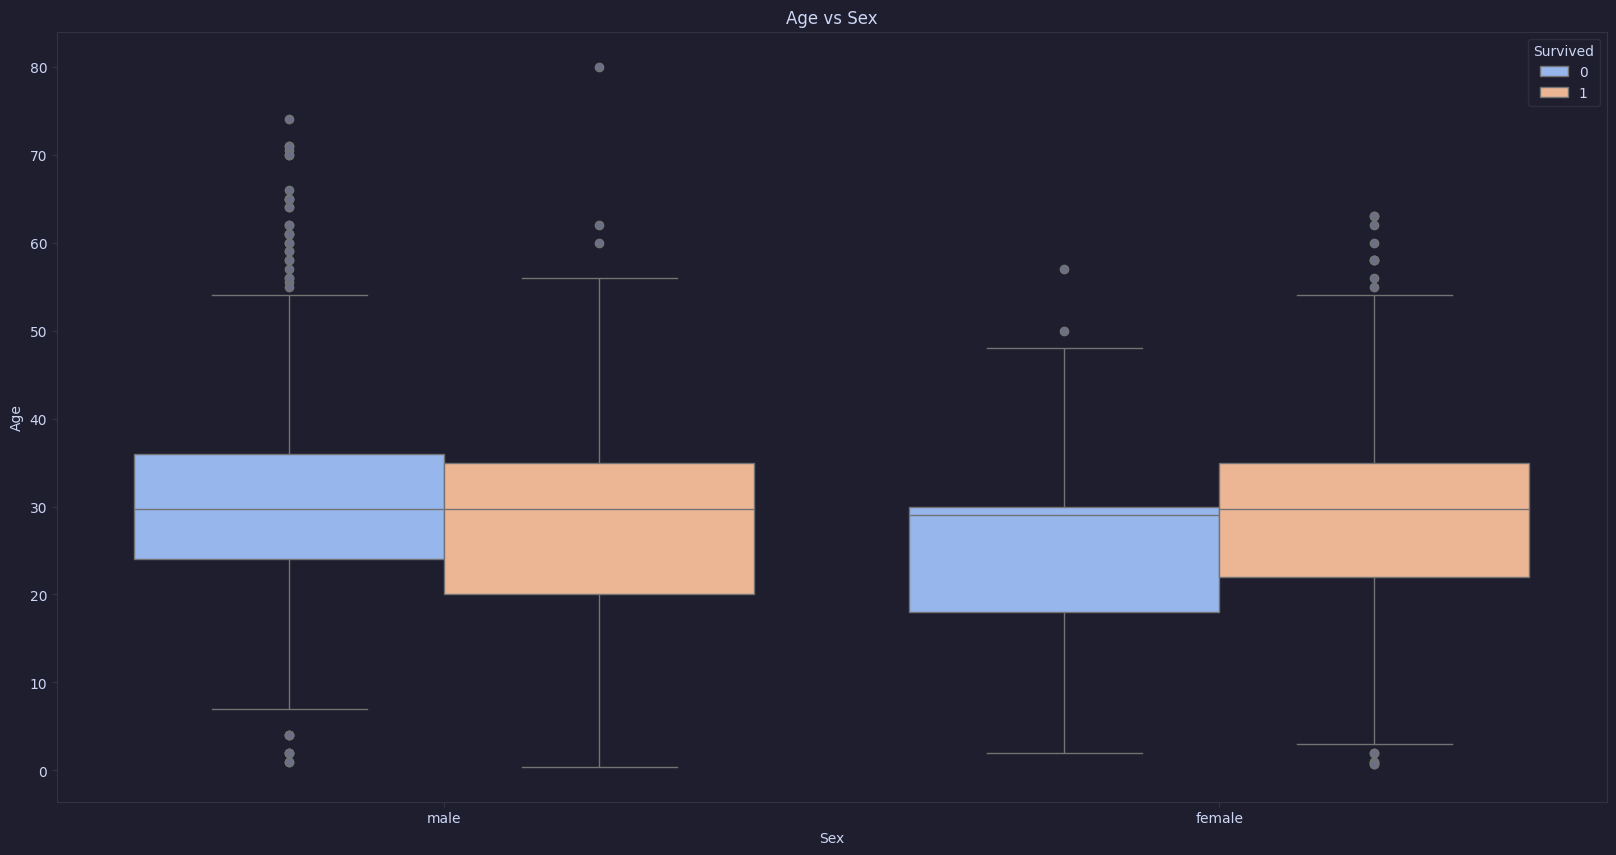

In [28]:
plt.figure(figsize=(20, 10))
sns.boxplot(
    data=df,
    x="Sex",
    y="Age",
    hue="Survived",
)
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Age vs Sex")